# SUNAT
**sunat_[train|test].csv**: información fiscal

+ tipcontribuyente: tipo de contribuyente sunat.
+ tippersona: tipo de persona sunat.
+ ciiu: codigo de actividad economica.
+ ubigeo: ubigeo.
+ condiciondomicilio: condicion del domicilio fiscal.
+ estadocontribuyente: estado del contribuyente.
+ fecalta: fecha del alta.
+ fecbaja: fecha de baja.
+ codvia: codigo de tipo de via registrado.
+ codzona: codigo de tipo de zona.
+ contabilidad: Tipo de contabilidad registrada.
+ facturacion: Tipo de facturacion registrada.
+ domiciliado: condicion de domiciliado registrada.
+ comercioexterior: Marca de actividad de comercio exterior.
+ cargorele: Cargo del Representante Legal.
+ codentidadtributo: Codigo de la entidad de la deuda tributaria.
+ estadotributo: Estado de la deuda tributaria.



In [1]:
import pandas as pd
import pickle as pickle
import numpy as np
from datetime import datetime
from datetime import date
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import os
import gc

pd.set_option('display.max_columns', None)

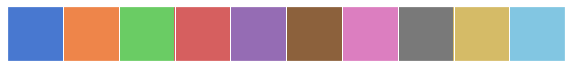

In [2]:
# Background graph style
sns.set(style="darkgrid")
# ==============
# Chouse color
# ==============
sns.palplot(sns.color_palette("muted"))  # show color
sns.set_palette("muted") # for seaborn
colors = sns.color_palette("muted") # for pyplot

In [3]:
def reduce_mem_usage(df, verbose=False):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    int_columns = df.select_dtypes(include=["int"]).columns
    float_columns = df.select_dtypes(include=["float"]).columns

    for col in int_columns:
        df[col] = pd.to_numeric(df[col], downcast="integer")

    for col in float_columns:
        df[col] = pd.to_numeric(df[col], downcast="float")

    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('../../data/raw/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/raw/productos.csv
../../data/raw/censo_train.csv
../../data/raw/censo_test.csv
../../data/raw/y_train.csv
../../data/raw/sample_submission.csv
../../data/raw/sunat_train.csv
../../data/raw/se_train.csv
../../data/raw/se_test.csv
../../data/raw/rcc_test.csv
../../data/raw/rcc_train.csv
../../data/raw/interbank20.zip
../../data/raw/sunat_test.csv


In [18]:
sunat_train = pd.read_csv("../../data/raw/sunat_train.csv").pipe(reduce_mem_usage)

In [64]:
sunat_test = pd.read_csv("../../data/raw/sunat_test.csv").pipe(reduce_mem_usage)

In [24]:
sunat_train.shape

(1462036, 18)

In [65]:
sunat_test.shape

(1687128, 18)

In [20]:
sunat_train.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
0,190597,9,0,178,442,0,0,-0.785832,NaN,0,0,6,11,0,1,635,8,2
1,162813,0,0,253,449,0,0,0.971584,NaN,20,0,6,11,0,1,635,8,2
2,190620,9,0,173,473,0,2,0.025283,-1.561407,11,0,6,11,0,1,635,8,2
3,43886,0,0,285,154,0,0,0.566027,NaN,11,3,6,11,0,1,635,8,2
4,255211,0,0,285,456,0,0,0.836399,NaN,11,3,6,11,0,1,635,8,2


In [66]:
sunat_test.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
0,371518,9,0,49,1434,0,0,1.782700,NaN,11,3,6,11,0,1,635,8,2
1,69182,9,0,173,175,0,0,-0.785832,-1.810068,0,3,0,0,0,1,635,8,2
2,362150,0,0,285,998,0,0,1.782700,NaN,0,3,6,11,0,1,635,8,2
3,261628,0,0,285,1321,0,0,2.053072,NaN,20,3,8,14,0,1,635,8,2
4,362252,9,0,178,482,0,2,1.106770,NaN,0,3,6,11,0,1,635,8,2


In [39]:
sunat_train.drop_duplicates().groupby('key_value').tipcontribuyente.count().reset_index().sort_values('tipcontribuyente',ascending=False).head(20)

,key_value,tipcontribuyente
172663,262090,96
80409,121911,63
57921,87603,51
149929,227523,47
157189,238557,45
151079,229322,45
152088,230796,38
90909,137886,36
62620,94718,33
191440,290958,30


In [38]:
sunat_train[sunat_train.key_value.isin([22287])].sort_values('key_value')

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
75886,22287,9,0,170,442,13,3,0.836399,-0.069441,3,3,2,2,0,2,635,8,2
1177556,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,2,436,4,1
1177555,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,2,436,6,1
1177554,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,2,436,6,1
1177553,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,2,436,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525158,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,1,436,4,1
525157,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,1,436,6,1
525156,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,1,436,4,1
525164,22287,18,1,178,456,4,3,-0.380275,1.173864,11,35,6,11,1,1,436,4,1


In [33]:
sunat_train[sunat_train.key_value.isin([3,5])].sort_values('key_value')

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
353054,3,9,0,177,1761,0,0,1.512328,NaN,3,3,2,2,0,2,635,6,1
353055,3,9,0,177,1761,0,0,1.512328,NaN,3,3,2,2,0,2,635,6,1
353056,3,9,0,177,1761,0,0,1.512328,NaN,3,3,2,2,0,2,635,6,1
352708,5,9,0,283,466,0,4,-0.515461,-2.556051,3,0,2,2,0,2,635,8,2
382676,5,9,0,283,1559,0,0,-1.191390,NaN,3,34,1,1,0,2,635,8,2


In [21]:
sunat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462036 entries, 0 to 1462035
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   key_value            1462036 non-null  int32  
 1   tipcontribuyente     1462036 non-null  int8   
 2   tippersona           1462036 non-null  int8   
 3   ciiu                 1462036 non-null  int16  
 4   ubigeo               1462036 non-null  int16  
 5   condiciondomicilio   1462036 non-null  int8   
 6   estadocontribuyente  1462036 non-null  int8   
 7   fecalta              1441139 non-null  float32
 8   fecbaja              738322 non-null   float32
 9   codvia               1462036 non-null  int8   
 10  codzona              1462036 non-null  int8   
 11  contabilidad         1462036 non-null  int8   
 12  facturacion          1462036 non-null  int8   
 13  domiciliado          1462036 non-null  int8   
 14  comercioexterior     1462036 non-null  int8   
 15

- Fecalta y fecbaja son los unicos campos que tienen nulos
- El numero unico de key_value es igual a 233866 mientras que en rcc_train hay 358487, por lo cual no contamos con informacion fiscal de todos los clientes 
- El dataset posee registros duplicados. Ej: key_value = 3
- Hay casos donde a pesar de que poseen el mismo key_value los registros parecieran pertenecer a personas diferentes o simplemente hubo un cambio de domicilio. Ej: key_value= 5 | 262090

In [11]:
print(sunat_train.nunique())

key_value              233866
tipcontribuyente           50
tippersona                  3
ciiu                      285
ubigeo                   1655
condiciondomicilio         15
estadocontribuyente        13
fecalta                    27
fecbaja                    28
codvia                     29
codzona                    36
contabilidad               12
facturacion                21
domiciliado                 3
comercioexterior           14
cargorele                 656
codentidadtributo           9
estadotributo               3
dtype: int64


In [13]:
sunat_train.shape

(1462036, 18)

Para continuar con nuestro analisis vamos a eliminar los registros duplicados y solo quedarnos con los clientes que matchean con la tabla rcc_train

In [40]:
train_key_values = pd.read_csv("../../data/raw/rcc_train.csv").key_value.unique().tolist()

In [41]:
sunat_train = sunat_train[sunat_train.key_value.isin(train_key_values)].drop_duplicates()

In [43]:
sunat_train.shape

(292479, 18)

In [67]:
test_key_values = pd.read_csv("../../data/raw/rcc_test.csv").key_value.unique().tolist()

In [68]:
sunat_test = sunat_test[sunat_test.key_value.isin(test_key_values)].drop_duplicates()

In [69]:
sunat_test.shape

(318821, 18)

In [44]:
print(sunat_train.nunique())

key_value              233866
tipcontribuyente           50
tippersona                  3
ciiu                      285
ubigeo                   1655
condiciondomicilio         15
estadocontribuyente        13
fecalta                    27
fecbaja                    28
codvia                     29
codzona                    36
contabilidad               12
facturacion                21
domiciliado                 3
comercioexterior           14
cargorele                 656
codentidadtributo           9
estadotributo               3
dtype: int64


In [56]:
sunat_train.describe(include='all').T # numerical data

,count,mean,std,min,25%,50%,75%,max
key_value,292479.0,176977.988690,102687.706164,0.000000,87794.500000,176673.00000,265073.000000,358486.000000
tipcontribuyente,292479.0,11.946499,15.981684,0.000000,0.000000,9.00000,14.000000,49.000000
tippersona,292479.0,0.401892,0.812364,0.000000,0.000000,0.00000,1.000000,3.000000
ciiu,292479.0,222.887510,64.412031,0.000000,178.000000,244.00000,285.000000,288.000000
ubigeo,292479.0,723.200582,447.932226,0.000000,451.000000,477.00000,1090.000000,1761.000000
condiciondomicilio,292479.0,0.389850,1.470406,0.000000,0.000000,0.00000,0.000000,14.000000
estadocontribuyente,292479.0,0.897189,2.044238,0.000000,0.000000,0.00000,0.000000,12.000000
fecalta,272027.0,0.869266,0.938069,-1.326576,0.295655,1.10677,1.647514,2.188258
fecbaja,46802.0,-0.109373,1.570162,-4.545339,-1.064085,0.17922,1.173864,2.168508
codvia,292479.0,9.607244,8.614153,0.000000,3.000000,11.00000,20.000000,28.000000


In [70]:
sunat_test.describe(include='all').T # numerical data

,count,mean,std,min,25%,50%,75%,max
key_value,318821.0,194421.846371,113608.580971,0.000000,95727.000000,193235.00000,291977.000000,396663.000000
tipcontribuyente,318821.0,12.489591,16.495397,0.000000,0.000000,9.00000,18.000000,49.000000
tippersona,318821.0,0.439946,0.854890,0.000000,0.000000,0.00000,1.000000,3.000000
ciiu,318821.0,224.185239,64.558911,0.000000,178.000000,244.00000,285.000000,288.000000
ubigeo,318821.0,724.252766,450.522050,0.000000,449.000000,477.00000,1090.000000,1761.000000
condiciondomicilio,318821.0,0.373617,1.431622,0.000000,0.000000,0.00000,0.000000,14.000000
estadocontribuyente,318821.0,0.862857,2.012318,0.000000,0.000000,0.00000,0.000000,11.000000
fecalta,293079.0,0.905445,0.944243,-1.326576,0.295655,1.10677,1.647514,2.323444
fecbaja,50043.0,-0.076571,1.567980,-5.291322,-1.064085,0.17922,1.173864,2.168508
codvia,318821.0,9.714388,8.663723,0.000000,3.000000,11.00000,20.000000,28.000000


### tipcontribuyente

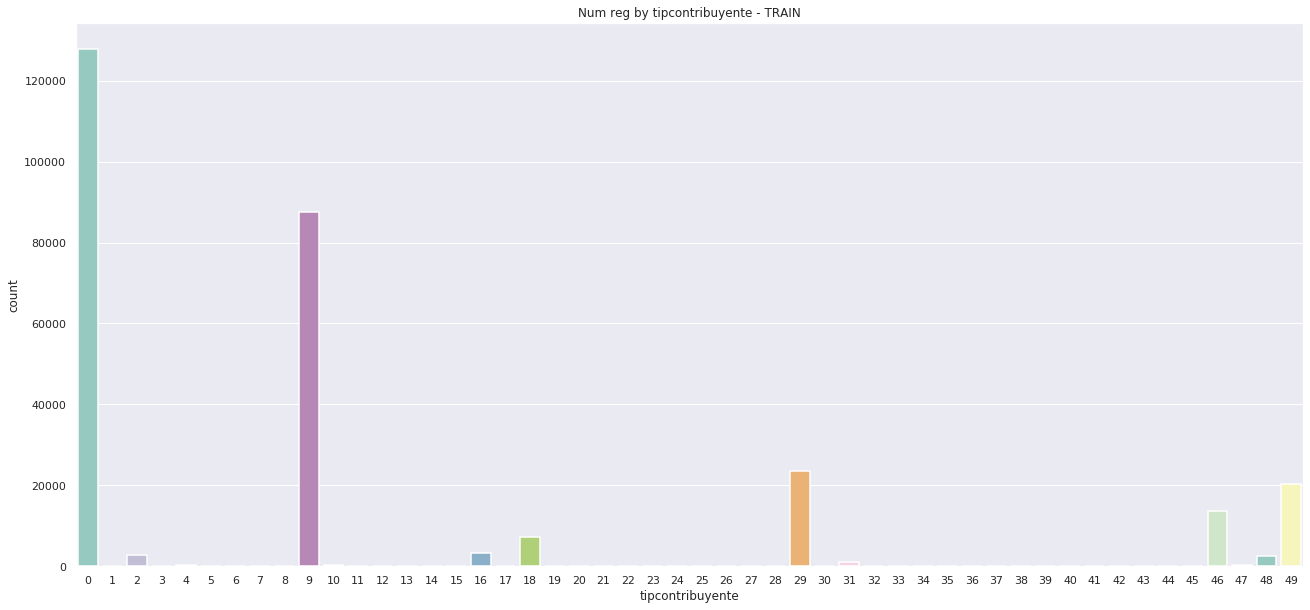

In [46]:
plt.figure(figsize=(22, 10))
ax = sns.countplot(x="tipcontribuyente",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.tipcontribuyente.unique().tolist().sort()).set_title("Num reg by tipcontribuyente - TRAIN")
pass

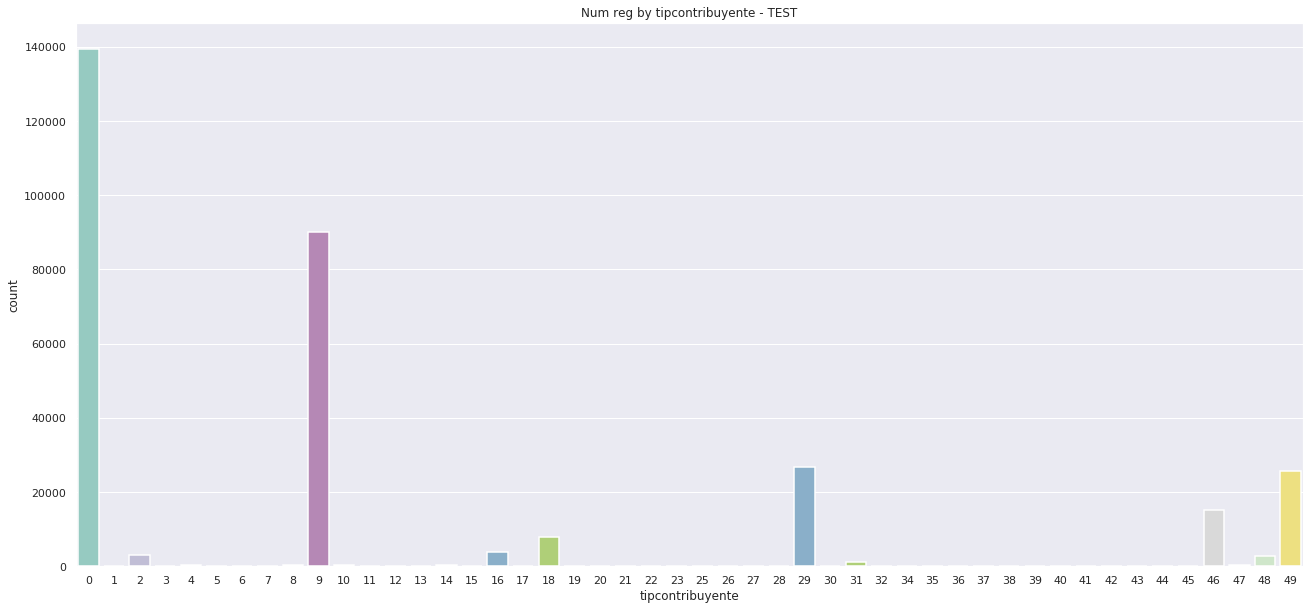

In [123]:
plt.figure(figsize=(22, 10))
ax = sns.countplot(x="tipcontribuyente",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_train.tipcontribuyente.unique().tolist().sort()).set_title("Num reg by tipcontribuyente - TEST")
pass

### tippersona

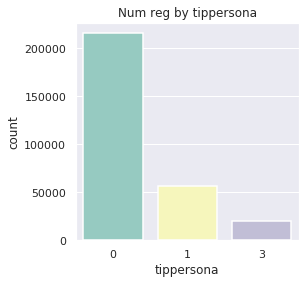

In [51]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="tippersona",linewidth=1.5,
                 palette="Set3", 
                 data=sunat_train).set_title("Num reg by tippersona")
pass

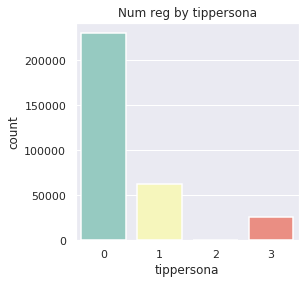

In [124]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="tippersona",linewidth=1.5,
                 palette="Set3", 
                 data=sunat_test).set_title("Num reg by tippersona")
pass

### ciiu

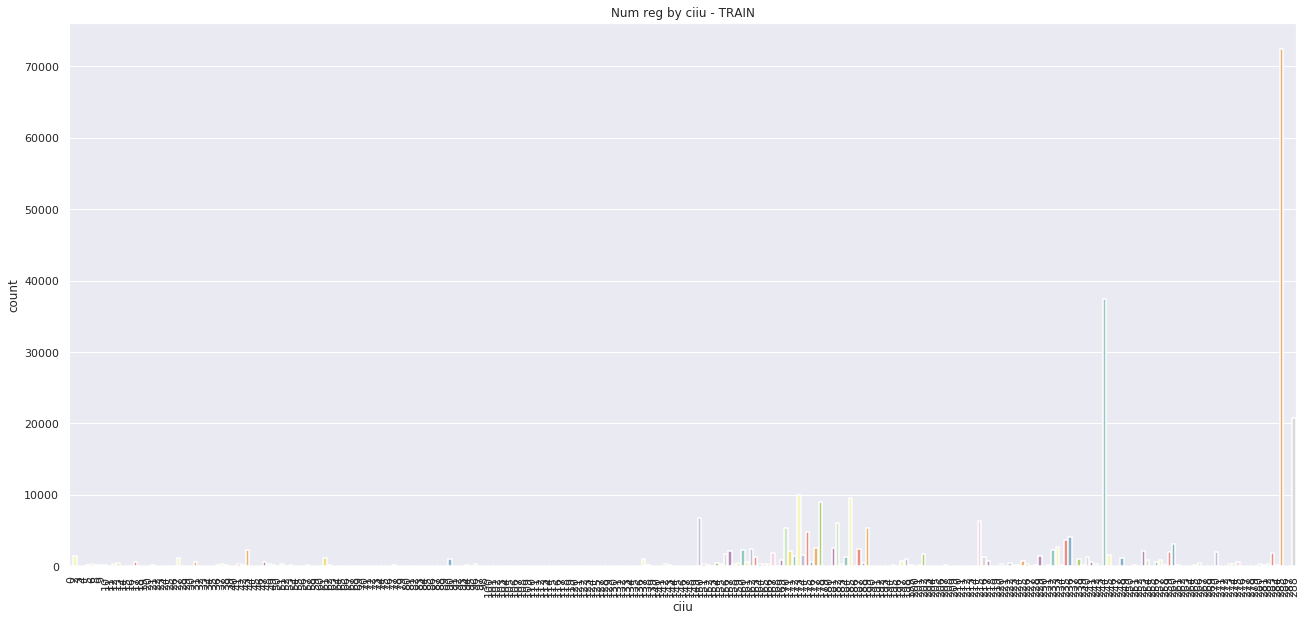

In [53]:
plt.figure(figsize=(22, 10))
ax = sns.countplot(x="ciiu",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.ciiu.unique().tolist().sort()).set_title("Num reg by ciiu - TRAIN")
plt.xticks(rotation=90)
pass

### ubigeo

In [55]:
sunat_train.ubigeo.describe(include='all')

count    292479.000000
mean        723.200582
std         447.932226
min           0.000000
25%         451.000000
50%         477.000000
75%        1090.000000
max        1761.000000
Name: ubigeo, dtype: float64

In [58]:
sunat_train.ubigeo.nunique()

1655

### condiciondomicilio
La distribucion de condiciones por domicilio son identicas en train y test. 

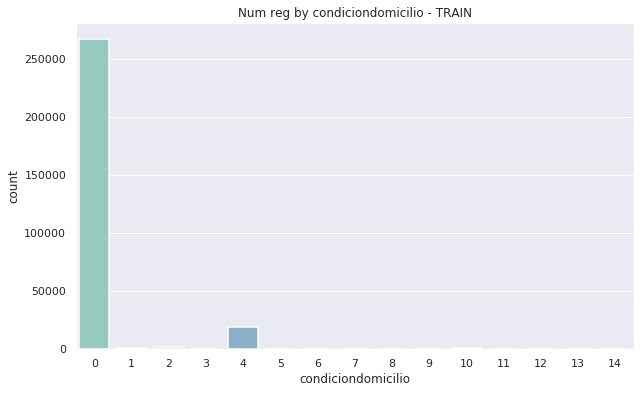

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="condiciondomicilio",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.condiciondomicilio.unique().tolist().sort()).set_title("Num reg by condiciondomicilio - TRAIN")
pass

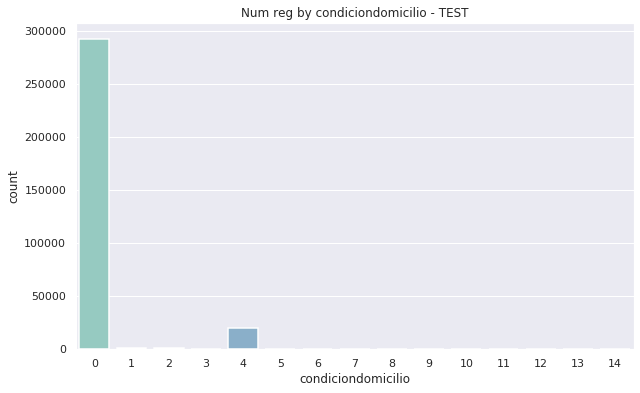

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="condiciondomicilio",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.condiciondomicilio.unique().tolist().sort()).set_title("Num reg by condiciondomicilio - TEST")
pass

### estadocontribuyente
La distribucion del estado del contribuyente son identicas en train y test. 

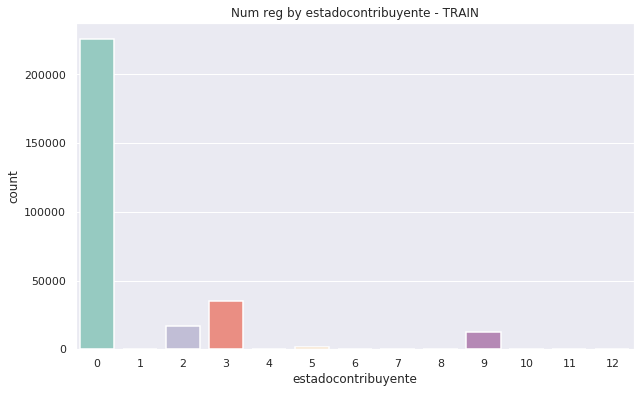

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="estadocontribuyente",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.estadocontribuyente.unique().tolist().sort()).set_title("Num reg by estadocontribuyente - TRAIN")
pass

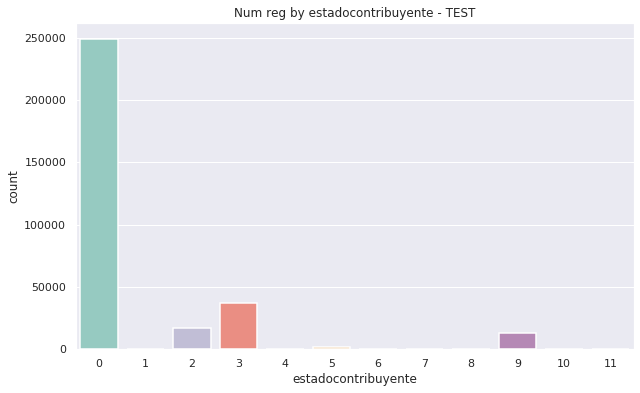

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="estadocontribuyente",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.estadocontribuyente.unique().tolist().sort()).set_title("Num reg by estadocontribuyente - TEST")
pass

### fecalta
+ La distribucion de fecha de alta son identicas en train y test. 
+ La variable parece estar normalizada

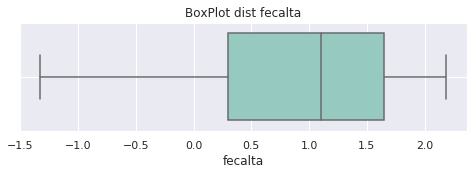

In [81]:
plt.figure(figsize=(8, 2))
ax = sns.boxplot(y="fecalta", orient="h", linewidth=1.5, palette="Set3", data=sunat_train) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist fecalta")
ax.yaxis.grid(True)
pass

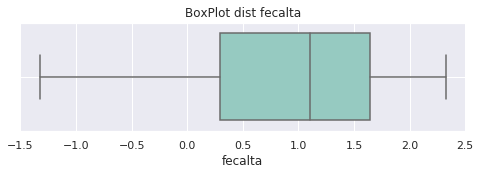

In [82]:
plt.figure(figsize=(8, 2))
ax = sns.boxplot(y="fecalta", orient="h", linewidth=1.5, palette="Set3", data=sunat_test) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist fecalta")
ax.yaxis.grid(True)
pass

### fecbaja
+ La distribucion de fecha de baja son identicas en train y test. 
+ La variable parece estar normalizada
+ Revisar outlier y vigote negativo - establecer un limite para esos valores

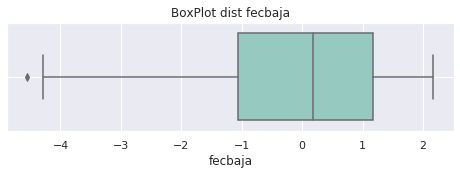

In [80]:
plt.figure(figsize=(8, 2))
ax = sns.boxplot(y="fecbaja", orient="h", linewidth=1.5, palette="Set3", data=sunat_train) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist fecbaja")
ax.yaxis.grid(True)
pass

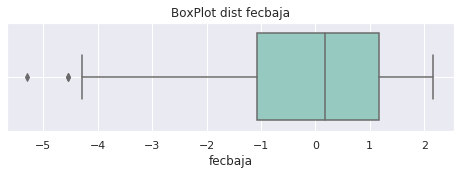

In [79]:
plt.figure(figsize=(8, 2))
ax = sns.boxplot(y="fecbaja", orient="h", linewidth=1.5, palette="Set3", data=sunat_test) # DataFrame, array, or list of arrays, optional
ax.set_title("BoxPlot dist fecbaja")
ax.yaxis.grid(True)
pass

### codvia
La distribucion de codigo de tipo de via son identicas en train y test. 

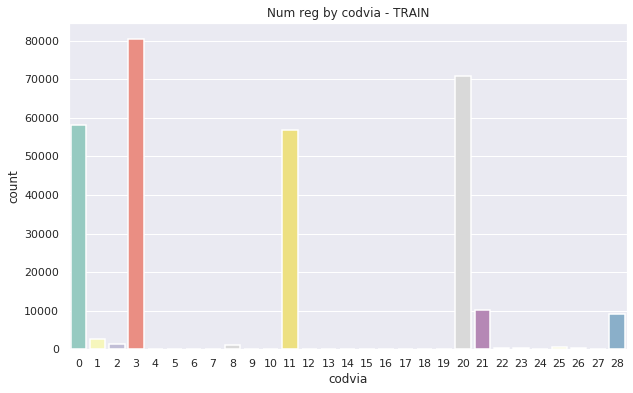

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="codvia",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.codvia.unique().tolist().sort()).set_title("Num reg by codvia - TRAIN")
pass

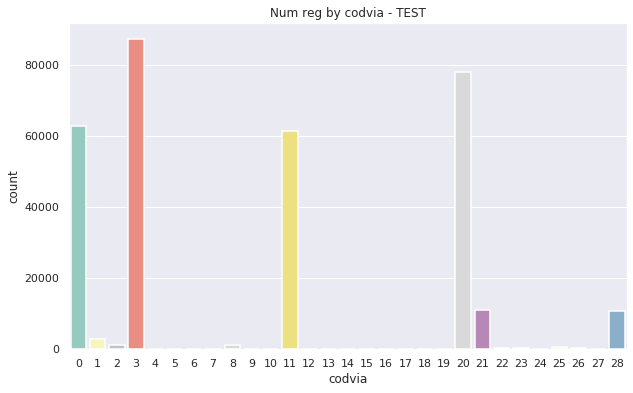

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="codvia",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.codvia.unique().tolist().sort()).set_title("Num reg by codvia - TEST")
pass

### codzona
La distribucion del codigo de tipo de zona son identicas en train y test. 

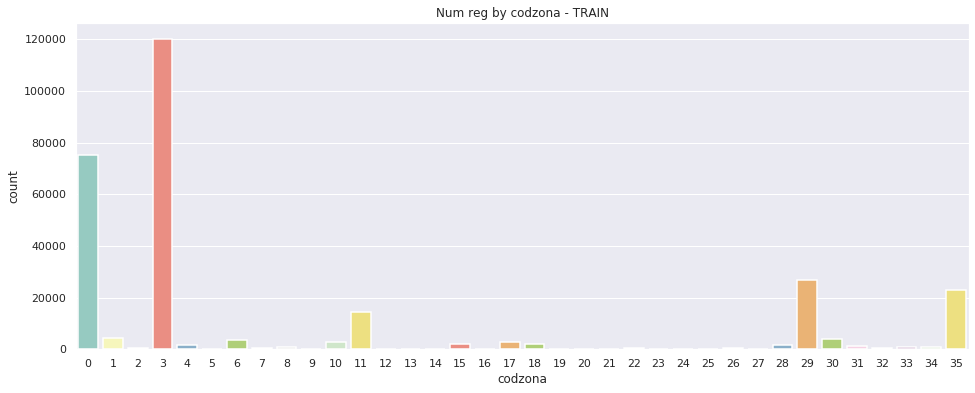

In [85]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="codzona",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.codzona.unique().tolist().sort()).set_title("Num reg by codzona - TRAIN")
pass

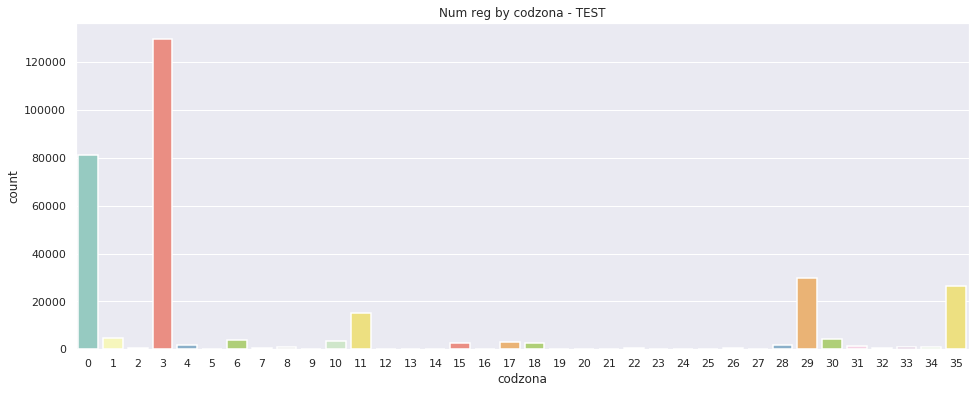

In [86]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="codzona",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.codzona.unique().tolist().sort()).set_title("Num reg by codzona - TEST")
pass

### contabilidad
La distribucion del tipo de contabilidad registrada son identicas en train y test. 

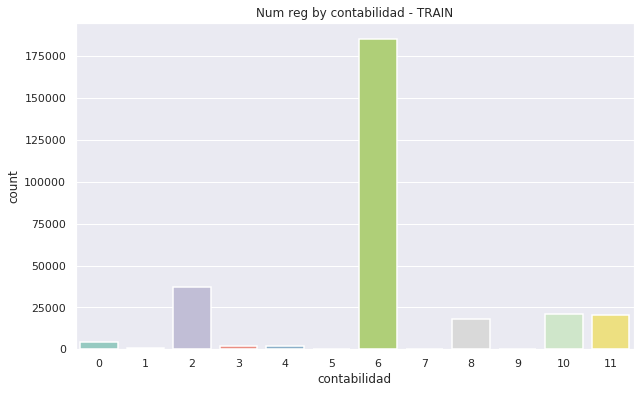

In [87]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="contabilidad",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.contabilidad.unique().tolist().sort()).set_title("Num reg by contabilidad - TRAIN")
pass

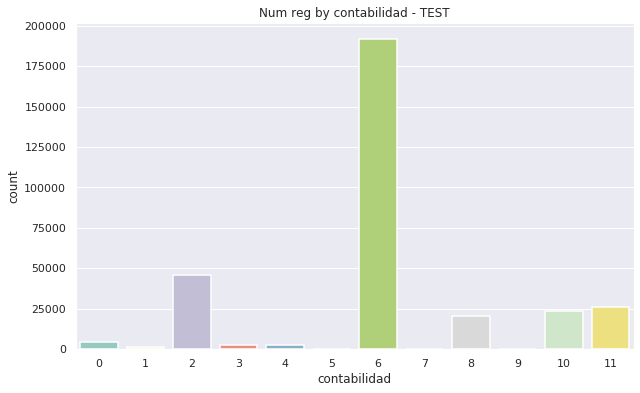

In [88]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="contabilidad",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.contabilidad.unique().tolist().sort()).set_title("Num reg by contabilidad - TEST")
pass

### facturacion
+ La distribucion del tipo de facturacion registrada son similares en train y test. 
+ En test existe el valor 7 que no esta presente en ningun registro en el de train
+ test posee 21 tipos de facturacion mientras que en train 20. 

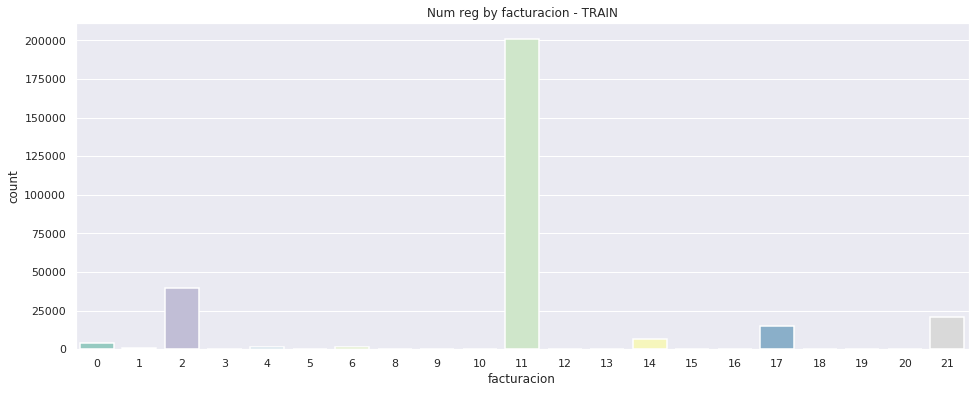

In [89]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="facturacion",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.facturacion.unique().tolist().sort()).set_title("Num reg by facturacion - TRAIN")
pass

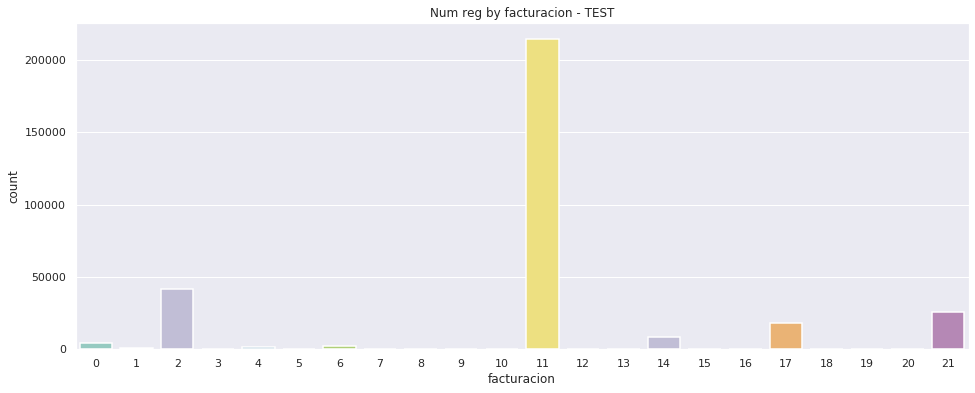

In [90]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="facturacion",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.facturacion.unique().tolist().sort()).set_title("Num reg by facturacion - TEST")
pass

### domiciliado
La distribucion de la condicion de domiciliado registrada son identicas en train y test. 

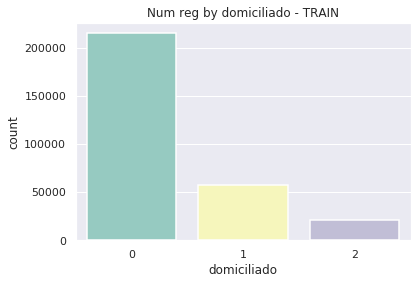

In [92]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="domiciliado",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.domiciliado.unique().tolist().sort()).set_title("Num reg by domiciliado - TRAIN")
pass

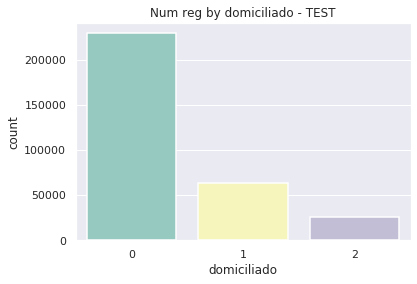

In [93]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="domiciliado",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.domiciliado.unique().tolist().sort()).set_title("Num reg by domiciliado - TEST")
pass

### comercioexterior
La distribucion del tipo de marca de actividad de comercio exterior son identicas en train y test. 

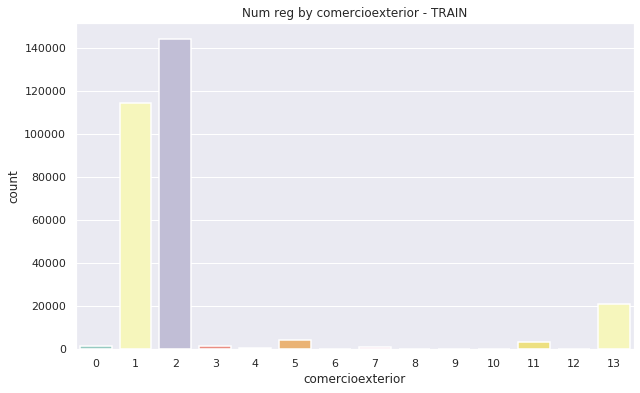

In [94]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="comercioexterior",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.comercioexterior.unique().tolist().sort()).set_title("Num reg by comercioexterior - TRAIN")
pass

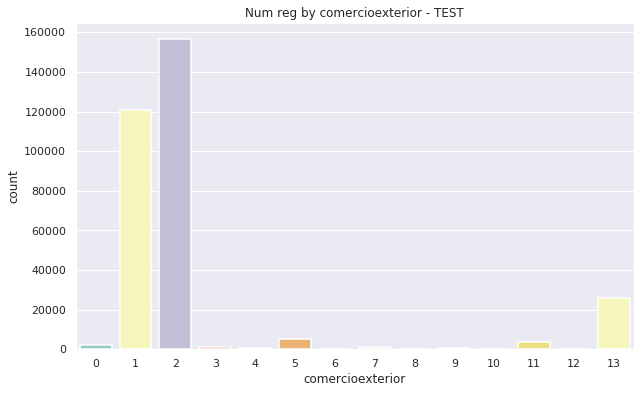

In [95]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="comercioexterior",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.comercioexterior.unique().tolist().sort()).set_title("Num reg by comercioexterior - TEST")
pass

### cargorele: Cargo del Representante Legal.

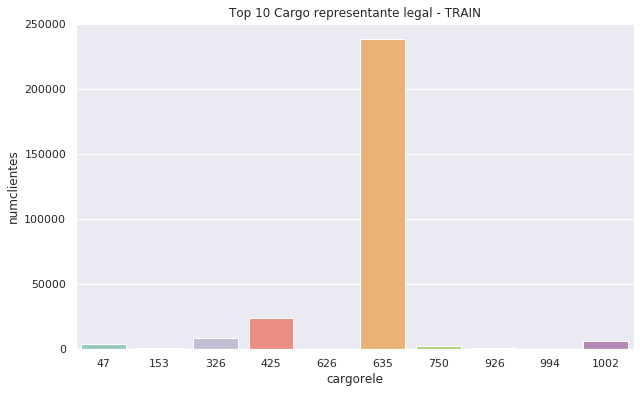

In [121]:
dfaggr = sunat_train.groupby(['cargorele']).key_value.count().reset_index()
dfaggr.columns = ['cargorele', 'numclientes']
cargorele_top10_df = dfaggr.sort_values('numclientes',ascending=False).iloc[:10]

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x="cargorele", y="numclientes",data=cargorele_top10_df, palette="Set3", orient='v') 
ax.set_title("Top 10 Cargo representante legal - TRAIN")
pass

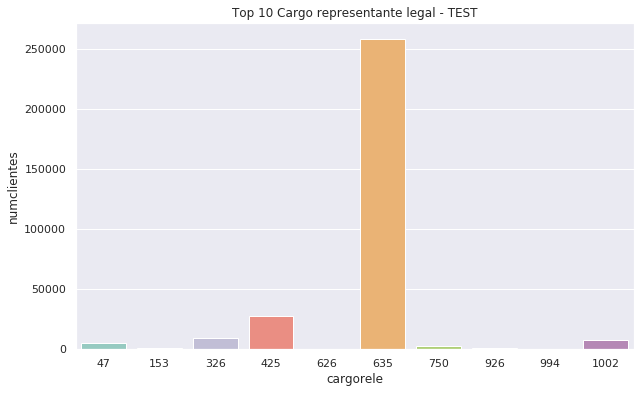

In [122]:
dfaggr = sunat_test.groupby(['cargorele']).key_value.count().reset_index()
dfaggr.columns = ['cargorele', 'numclientes']
cargorele_top10_df = dfaggr.sort_values('numclientes',ascending=False).iloc[:10]

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x="cargorele", y="numclientes",data=cargorele_top10_df, palette="Set3", orient='v') 
ax.set_title("Top 10 Cargo representante legal - TEST")
pass

### codentidadtributo
+ La distribucion del codigo de la entidad de la deuda tributaria son similares en train y test. 
+ No aparece ningun caso en test con el codigo 3
+ En train hay 9 codigos diferentes mientras que en test 8 codigos diferentes

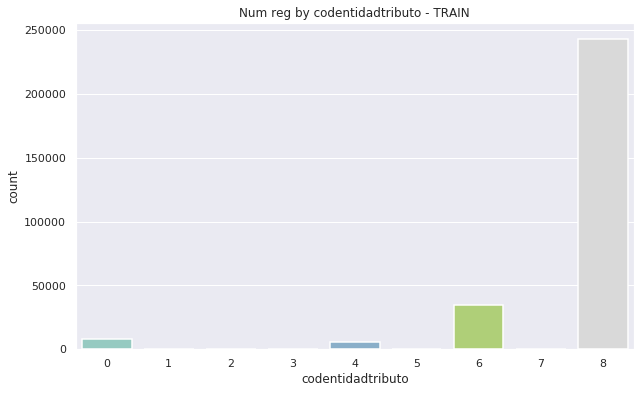

In [98]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="codentidadtributo",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.codentidadtributo.unique().tolist().sort()).set_title("Num reg by codentidadtributo - TRAIN")
pass

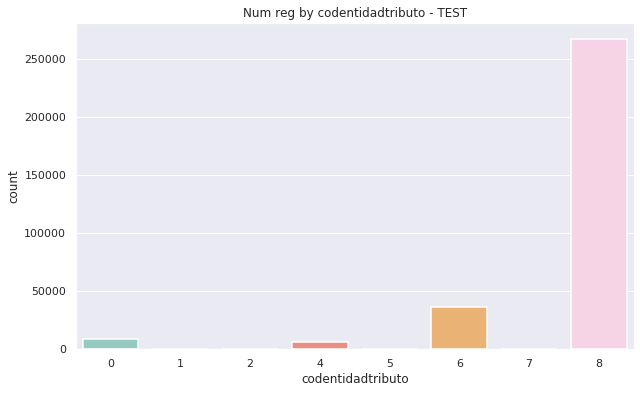

In [99]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="codentidadtributo",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.codentidadtributo.unique().tolist().sort()).set_title("Num reg by codentidadtributo - TEST")
pass

### estadotributo
La distribucion del estado de la deuda tributaria son identicas en train y test. 

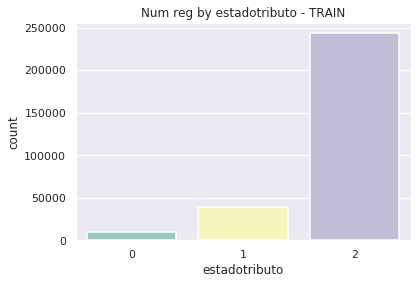

In [96]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="estadotributo",linewidth=1.5, palette="Set3", data=sunat_train, order=sunat_train.estadotributo.unique().tolist().sort()).set_title("Num reg by estadotributo - TRAIN")
pass

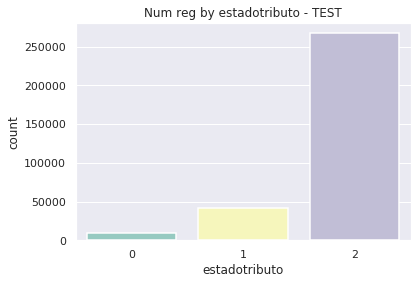

In [97]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="estadotributo",linewidth=1.5, palette="Set3", data=sunat_test, order=sunat_test.estadotributo.unique().tolist().sort()).set_title("Num reg by estadotributo - TEST")
pass